In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import copy

sys.path.insert(1, '../metadl/baselines/sentive_ai')
from sentive.sentive_vision_network import sentive_vision_network

from sentive.sentive_brain import sentive_brain

root_ep = 'episode_'
suf_eptest = '_1.csv'
root_test= 'test_'

episode = np.zeros([1, 5, 28, 28, 2])
test = np.zeros([5, 28, 28, 2])
for i in range(5):
    episode[0][i][:,:,0] = np.loadtxt(root_ep+str(i)+suf_eptest)
    episode[0][i][:,:,1] = np.loadtxt(root_ep+str(i)+suf_eptest)

    test[i][:,:,0] = np.loadtxt(root_test+str(i)+suf_eptest)
    test[i][:,:,1] = np.loadtxt(root_test+str(i)+suf_eptest)



$ >********* network: 0
nombre de neurones taille 1: 56


______________________________________________________________________________________
nrn2 id 57
new_x 9
new_y 7
central_pixel_id 1
nrn_pxl_map[new_y][x] 1.0
tmp_sub_pxl_map :
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 2. 3.]]
tmp_list_sub_pxl [0, 2, 3]
nrn_pxl_id 2
nrn_pxl id & weight : 2 0.9633017778396606
nrn_pxl_id 3
nrn_pxl id & weight : 3 0.9887948036193848
x_composant [0.0, 0.9887948036193848]
y_composant [0.9633017778396606, 0.9887948036193848]
vecteur orientation sans shift: 0.506529652790199 1.0
PROCHAIN NEURONE: [new_x: 10 , new_y: 8 ]
PROCHAIN NEURONE SANS CHANGEMENT: [new_x: 10 , new_y: 8 ]
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.94592118 0.        ]
 [0.         0.96330178 0.9887948 ]]
neurone a supprimer dans la matrice : x : 2 y: 2
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.94592118 0.        ]
 [0.         0.96330178 0.        ]]
barycentre [1.         1.50455175]
##

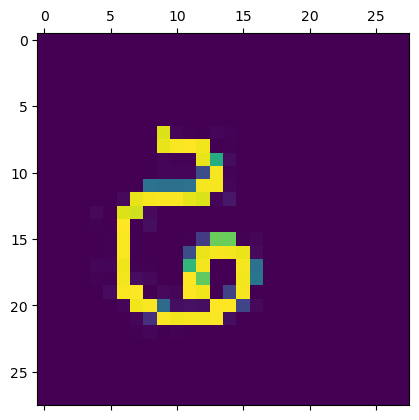

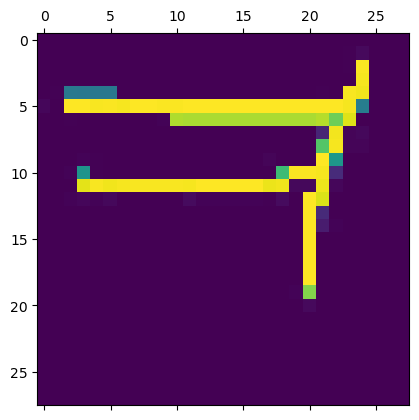

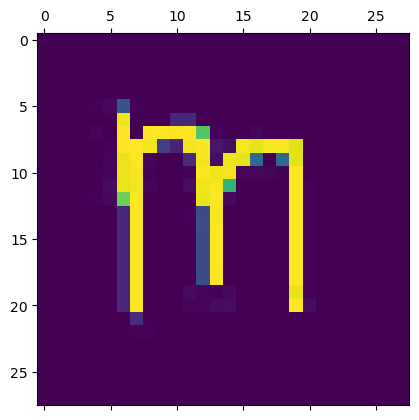

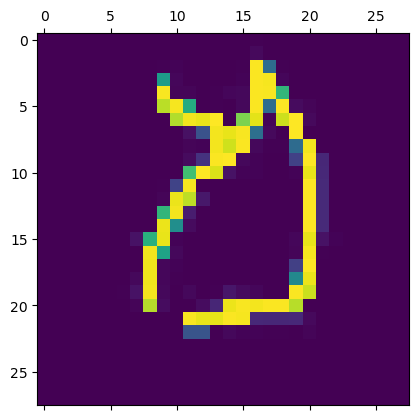

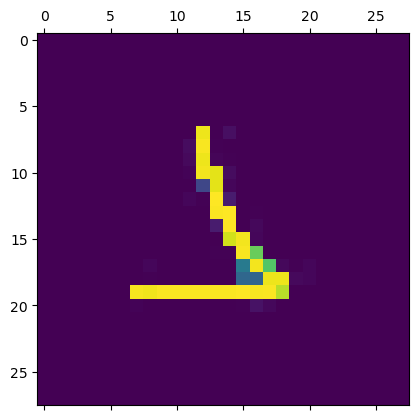

In [2]:
sbrain = sentive_brain(episode,5)

In [3]:
# to be removed                                                    
char_id = 0
self = sbrain.nnet[char_id]        
# to be removed 


nombre de neurones taille 1: 53


______________________________________________________________________________________
nrn2 id 54
new_x 5
new_y 5
central_pixel_id 1
nrn_pxl_map[new_y][x] 1.0
tmp_sub_pxl_map :
 [[0. 0. 0.]
 [0. 0. 2.]
 [0. 0. 0.]]
tmp_list_sub_pxl [0, 2]
nrn_pxl_id 2
nrn_pxl id & weight : 2 0.9713709354400635
x_composant [0.9713709354400635]
y_composant [0.0]
vecteur orientation sans shift: 1.0 0.0
PROCHAIN NEURONE: [new_x: 6 , new_y: 5 ]
PROCHAIN NEURONE SANS CHANGEMENT: [new_x: 6 , new_y: 5 ]
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.98278606 0.97137094]
 [0.         0.         0.        ]]
neurone a supprimer dans la matrice : x : 2 y: 1
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.98278606 0.        ]
 [0.         0.         0.        ]]
barycentre [1. 1.]
###############################
nrn3 55
basis_vector {'x': 1.0, 'y': 0.0}
###############################
nrn3 56


__________________________________________

[0.24784032577183499,
 0.8847165710334053,
 0.3314675894354124,
 0.2264585194821289,
 0.33319205692078]

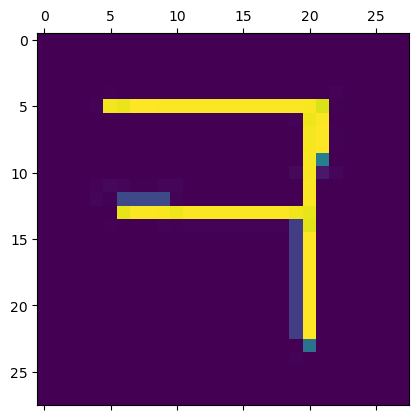

In [4]:
# to be removed : header of the function
sbrain.predict(test[1])


In [5]:
x = [0]
y = []
h = []
cumsum_x = 0
last_angle = 0
for nrn in sbrain.nnet[char_id].nrn_tls.lst_nrns:
    if nrn.neuron["type"] == "sentive_vision_curve":
        cumsum_x += nrn.neuron["meta"]["curve"]["nb_iteration"]
        x.append(cumsum_x)
        x.append(cumsum_x)
        print(nrn.neuron["_id"], ":", nrn.neuron["meta"]["curve"]["starting_point"], " *", nrn.neuron["meta"]["curve"]["nb_iteration"],"* ",cumsum_x,",",  nrn.neuron["meta"]["curve"]["angle"], nrn.neuron["meta"]["curve"]["acceleration"])
        last_angle = nrn.neuron["meta"]["curve"]["angle"]
        y.append(last_angle)
        y.append(last_angle)
        tmp_h = np.ones( nrn.neuron["meta"]["curve"]["nb_iteration"]) * last_angle
        h.extend(tmp_h)
y.append(last_angle)        
print("_______________________________________________________")
for nrn in sbrain.nnet[char_id].nrn_tls.lst_nrns:
    if nrn.neuron["type"] == "sentive_vision_line":
        print(nrn.neuron["_id"],  ":", nrn.neuron["meta"]["line"]["starting_point"] , " *", nrn.neuron["meta"]["line"]["nb_iteration"],"* ", )

58 : {'x': 9, 'y': 7}  * 2 *  2 , -1.1104675434547855 0.0
62 : {'x': 11, 'y': 8}  * 9 *  11 , 0.4295161186360927 -2.2701239672769e-10
75 : {'x': 8, 'y': 11}  * 16 *  27 , -0.2290243547545857 0.012114647062218696
95 : {'x': 14, 'y': 20}  * 6 *  33 , -0.6066330038438257 0.0
102 : {'x': 11, 'y': 17}  * 2 *  35 , 1.1915383955343106 0.0
_______________________________________________________
59 : {'x': 9, 'y': 7}  * 7 * 
63 : {'x': 11, 'y': 8}  * 3 * 
69 : {'x': 13, 'y': 11}  * 9 * 
76 : {'x': 8, 'y': 11}  * 8 * 
88 : {'x': 8, 'y': 20}  * 5 * 


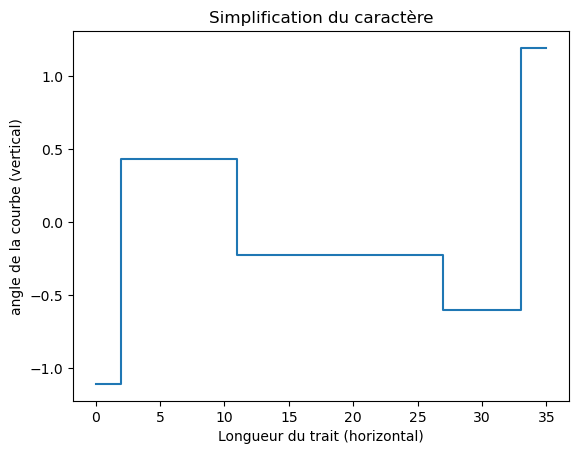

In [6]:
# tracer un graphique en escalier avec les points fournis
plt.plot(x, y, drawstyle='steps-post')

# ajouter des titres et des étiquettes d'axes
plt.title('Simplification du caractère')
plt.xlabel('Longueur du trait (horizontal)')
plt.ylabel('angle de la courbe (vertical)')

# afficher le graphique
plt.show()


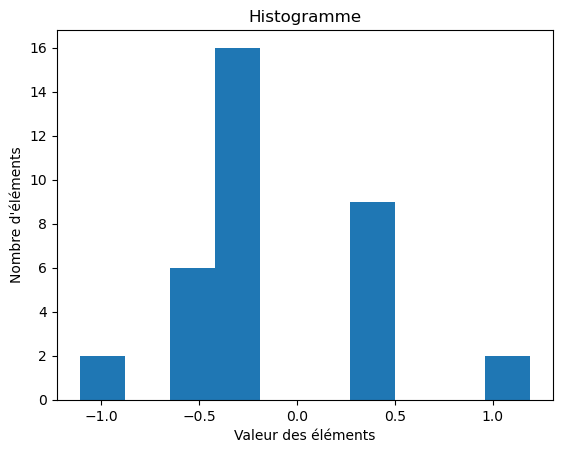

In [7]:
# tracer un histogramme avec les données fournies
plt.hist(h, bins=10)

# ajouter des titres et des étiquettes d'axes
plt.title('Histogramme')
plt.xlabel('Valeur des éléments')
plt.ylabel('Nombre d\'éléments')

# afficher le graphique
plt.show()


In [ ]:
sbrain.nnet[char_id].nrn_tls.get_neuron_from_id(75)

{'_id': 75,
 'schema_version': 2,
 'type': 'sentive_vision_curve',
 'layer_id': 2,
 'DbConnectivity': {'pre_synaptique': [74,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   89,
   90,
   91,
   92,
   93],
  'post_synaptique': [],
  'lateral_connexion': [95],
  'anti_lateral': [62],
  'anti_post_synaptique': [76, 88],
  'weights': {}},
 'meta': {'threshold': 0.7,
  'pending_nb_iteration': 11,
  'averaged_prediction': 0.0,
  'last_vector': {'x': 0.0, 'y': 0.0},
  'curve': {'starting_point': {'x': 8, 'y': 11},
   'basis_vector': {'x': -0.7071067811865475, 'y': 0.8164965809277261},
   'last_position': {'x': 13, 'y': 20},
   'nb_iteration': 16,
   'angle': -0.2290243547545857,
   'acceleration': 0.012114647062218696,
   'malm_angle': 0.0,
   'malm_acceleration': 0.0,
   'pixels_matrix': array([{'x': 8, 'y': 11}, {'x': 7, 'y': 12}, {'x': 6, 'y': 13},
          {'x': 6, 'y': 14}, {'x': 6, 'y': 15}, {'x': 6, 'y': 16},
          {'x': 6, 'y': 17}, {'x': 6, 'y': 18}, {

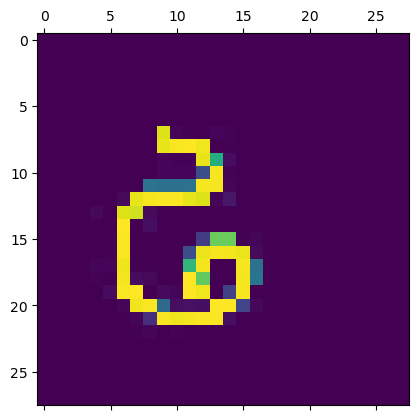

In [ ]:
sbrain.nnet[char_id].show_receptive_field_id(55)

In [ ]:
start = {
    "x": 24,
    "y": 2
}
b_v = {
    "x": 0,
    "y": 1
}
angl = 0.12306477575714833
acc = -0.12306477575714833/6.645
n = 17
ck_pts = []
ck_pts.append({
    "x" : 20,
    "y" : 12
})
ck_pts.append({
    "x" : 20,
    "y" : 13
})
ck_pts.append({
    "x" : 20,
    "y" : 18
})

print(sbrain.nnet[char_id].nrn_tls.check_curve_geometry(start, b_v, angl, acc, n, ck_pts))

[0.47068050626773655, 0.21485760114570812, 0.12788242233031416]


**nrn_drawer** : position de départ x 24 y 2
**nrn_drawer** : position intermédiaire x 24 y 4
**nrn_drawer** : position intermédiaire x 24 y 5
**nrn_drawer** : position intermédiaire x 23 y 6
**nrn_drawer** : position intermédiaire x 23 y 7
**nrn_drawer** : position intermédiaire x 23 y 8
**nrn_drawer** : position intermédiaire x 22 y 9
**nrn_drawer** : position intermédiaire x 22 y 10
**nrn_drawer** : position intermédiaire x 21 y 10
**nrn_drawer** : position intermédiaire x 21 y 11
**nrn_drawer** : position intermédiaire x 20 y 12
**nrn_drawer** : position intermédiaire x 20 y 13
**nrn_drawer** : position intermédiaire x 20 y 14
**nrn_drawer** : position intermédiaire x 20 y 15
**nrn_drawer** : position intermédiaire x 20 y 16
**nrn_drawer** : position intermédiaire x 20 y 17
**nrn_drawer** : position intermédiaire x 20 y 18
**nrn_drawer** : angle final: -0.17823041677591098
**nrn_drawer** : position finale x 20 y 18
**nrn_drawer** : dernier vector {'x': 0.28660140019995617, 'y': 0.9

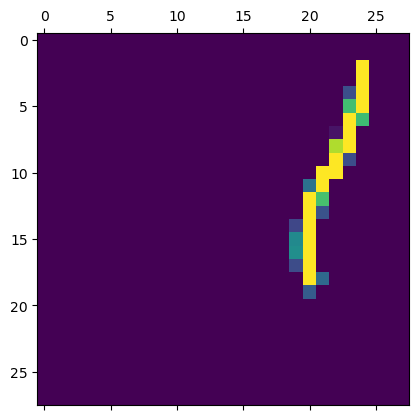

In [ ]:
# {'x': 0.0, 'y': 1.0} 0.12306477575714833 -0.018830949533316203
mtrx = np.zeros([28,28])
vector_1= {
    "x" : 0, 
    "y" : 1
}
angle =  0.12306477575714833
acc =  -0.018830949533316203
length = 17
start= {
    "x" : 24,
    "y" : 2
}

mtrx, angle, start, vector_1, _ = sbrain.nnet[0].nrn_tls.nrn_drawer(mtrx, vector_1, angle, length, start,acc)
plt.matshow(mtrx)